<a href="https://colab.research.google.com/github/mohithxoxo/Deep-Neural-Network-Models/blob/master/digits_recognize_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import cv2
from keras.datasets import mnist

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Train: X=(48000, 28, 28), y=(48000,)
Test: X=(10000, 28, 28), y=(10000,)
Validation: X=(12000, 28, 28), y=(12000,)


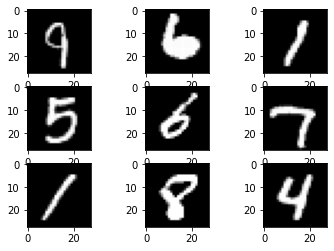

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
print('Validation: X=%s, y=%s' % (val_images.shape, val_labels.shape))

# lets plot few images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()



In [4]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(48000, 28, 28)
(10000, 28, 28)
(12000, 28, 28)


In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)

In [6]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [0]:
#Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [11]:
import time
start_time = time.time()

callbacks = myCallback()
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 30, validation_data = (val_images, val_labels), callbacks = [callbacks])


print("--- %s seconds to finish training model ---" % (time.time() - start_time))

Epoch 1/30
1500/1500 [==============================] - 25s 17ms/step - loss: 2.3774 - accuracy: 0.3114 - val_loss: 0.6669 - val_accuracy: 0.8049
Epoch 2/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.8785 - accuracy: 0.7144 - val_loss: 0.1936 - val_accuracy: 0.9486
Epoch 3/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.5438 - accuracy: 0.8325 - val_loss: 0.1204 - val_accuracy: 0.9653
Epoch 4/30
1500/1500 [==============================] - 25s 16ms/step - loss: 0.4230 - accuracy: 0.8741 - val_loss: 0.0914 - val_accuracy: 0.9718
Epoch 5/30
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3624 - accuracy: 0.8928 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 6/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.3221 - accuracy: 0.9069 - val_loss: 0.0660 - val_accuracy: 0.9794
Epoch 7/30
1500/1500 [==============================] - 25s 16ms/step - loss: 0.3032 - accuracy: 0.9147 - val_loss: 0.0615 -

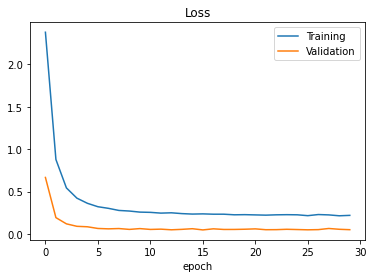

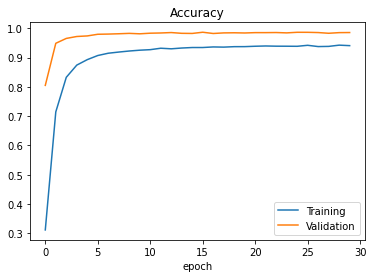

In [12]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [13]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0409 - accuracy: 0.9884
Test loss :  0.04085816442966461
Test Accuracy :  0.9883999824523926


In [14]:
model.save('digit_recognizer_model')
model.save("digit_recognizer_model.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_recognizer_model/assets
